In [209]:
import utilities as my_utils
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
from multihotembedding import MultihotEmbedding
import numpy as np
import matplotlib.pylab as plt
plt.style.use('seaborn-white')

In [210]:
sentences = my_utils.build_sentences()
TEST_FILE_PATH = "data/validation/test_chords_double_pairs.txt"
IMAGES_PATH = "images/embeddings_scores/"
EXT = ".pdf"

In [211]:
ft.corpus_total_words, ft.corpus_count, len(sentences)

(1243944, 25644, 25644)

# For 100

In [331]:
def test_embedding_size(testing_size):
    results = {
        "Word2Vec CBOW": [],
        "Word2Vec Skip-Gram": [],
        "FastText": [],
    }

    for size in testing_size:
        w2vCBOW = Word2Vec(sentences=sentences, min_count=1, size=size, window=2, sg=0)
        w2vSG = Word2Vec(sentences=sentences, min_count=1, size=size, window=2, sg=1)
        ft = FastText(sentences=sentences, min_count=1, size=size, window=2)
        models = {
            "Word2Vec CBOW": w2vCBOW, 
            "Word2Vec Skip-Gram": w2vSG, 
            "FastText": ft
        }
        for model_name, model in models.items():
            model_score = model.wv.evaluate_word_analogies(TEST_FILE_PATH)[0]
            results[model_name].append(model_score)
    return results

def plot_embedding_size(results, title, testing_size, plot_mh=True):
    for i, item in enumerate(results.items()):
        name, values = item
        c=plt.cm.viridis(i/len(results))
        plt.plot(testing_size, values, label=name, linewidth=4, c=c)
        
    if plot_mh:
        plt.scatter(33, mh.wv.evaluate_word_analogies(TEST_FILE_PATH)[0], label="MultihotEmbedding", linewidth=4, c='orange')
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(8, 5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel("Size", fontsize=17)
    plt.ylabel("Evaluation score", fontsize=17)
    plt.title(title, fontsize=22)
    plt.legend(prop={'size': 16})
    plt.xticks(np.arange(0, 37, 4.0)) 
    ax.xaxis.grid(True)
    plt.savefig(IMAGES_PATH+title.replace(" ","")+str(len(list(results.values())[0]))+EXT)
    plt.show()

In [329]:
testing_size = range(1, 100, 4)
# results_100 = test_embedding_size(testing_size)

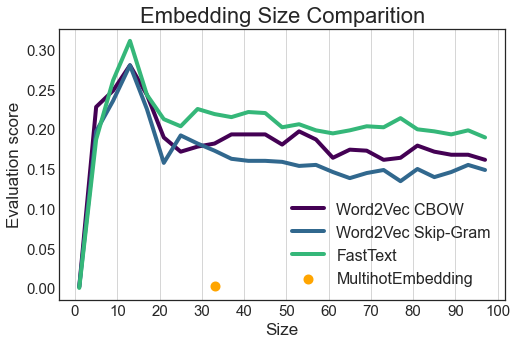

In [330]:
plot_embedding_size(results_100, "Embedding Size Comparition", testing_size)

# For 33

In [332]:
testing_size = range(1, 34, 1)
# results_33 = test_embedding_size(testing_size)

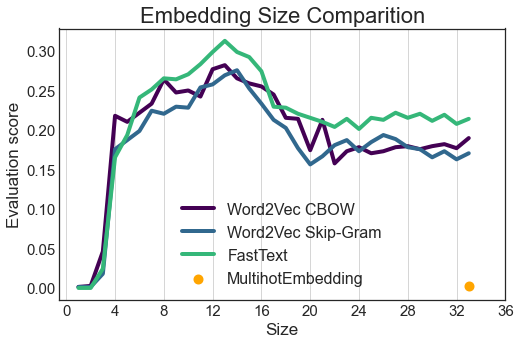

In [333]:
plot_embedding_size(results_33, "Embedding Size Comparition", testing_size)

## Embedding Size The Best Results

In [238]:
print(mh_name, mh_score, 33)
for model_name in results_33.keys():
    print(model_name, max(results_33[model_name]),results_33[model_name].index(max(results_33[model_name]))+1)

MultihotEmbedding 0.002560819462227913 33
Word2Vec CBOW 0.28169014084507044 13
Word2Vec Skip-Gram 0.2752880921895006 14
FastText 0.31241997439180536 13


# Window Size

In [336]:
def test_window_size(testing_size, result=None):
    results = result or {
        "Word2Vec CBOW": [],
        "Word2Vec Skip-Gram": [],
        "FastText": [],
    }

    for window in window_range:
        print(f"window: {window}")
        w2vCBOW = Word2Vec(sentences=sentences, min_count=1, size=13, window=window, sg=0)
        w2vSG = Word2Vec(sentences=sentences, min_count=1, size=14, window=window, sg=1)
        ft = FastText(sentences=sentences, min_count=1, size=13, window=window)
        models = {
            "Word2Vec CBOW": w2vCBOW, 
            "Word2Vec Skip-Gram": w2vSG, 
            "FastText": ft
        }
        for model_name, model in models.items():
            model_score = model.wv.evaluate_word_analogies(TEST_FILE_PATH)[0]
            results[model_name].append(model_score)
    return results

def plot_window_size(results, title, window_range):
    plt.style.use('seaborn-white')
    for i, item in enumerate(results_window.items()):
        name, values = item
        c=plt.cm.viridis(i/len(results_window))
        plt.plot(window_range, values, label=name, linewidth=4, c=c)
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(8, 5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel("Size", fontsize=17)
    plt.ylabel("Evaluation score", fontsize=17)
    title = "Embedding Window Comparition"
    plt.title(title, fontsize=22)
    plt.legend(prop={'size': 16})
    plt.xticks(np.arange(0, 21, 2.0)) 
    ax.xaxis.grid(True)
    plt.savefig(IMAGES_PATH+title.replace(" ","")+EXT)
    plt.show()

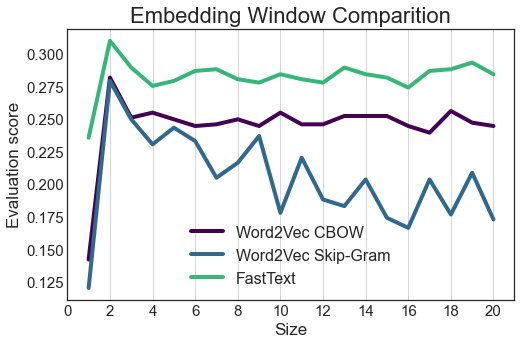

In [337]:
window_range = range(1, 21)
# results_window = test_window_size(window_range)
plot_window_size(results_window, "Embedding Window Comparition", window_range)

In [262]:
for model_name in results_window.keys():
    print(model_name, max(results_window[model_name]),results_window[model_name].index(max(results_window[model_name]))+1)

Word2Vec CBOW 0.28169014084507044 2
Word2Vec Skip-Gram 0.2791293213828425 2
FastText 0.30985915492957744 2


In [ ]:
# sg=0 CBOW
# sg=1 skip-gram
# window is the maximum distance between the current and predicted word within a sentence.

# The Best Embedding

In [386]:
ft = FastText(sentences=sentences, min_count=1, size=13, window=2)
scores = ft.wv.evaluate_word_analogies(TEST_FILE_PATH)[1][:-1]
for i in range(len(scores)):
    print(scores[i]['section'], ":", 100*round(len(scores[i]["correct"])/(len(scores[i]["incorrect"])+len(scores[i]["correct"])),4))

root_change : 3.05
chord_type_change : 16.8
V-I_progression : 52.27
II-V_progression : 100.0
V/V-V_progression : 4.55
less_common_progression : 2.33
